# Fashion MNIST 

### In this part of the project, we will use a couple of methods:
    
#####       - Tensorflow for data importation
#####       - Visualization for deeper understaing of the data 
#####       - PCA for compression
#####       - Dummy Model for comparison with complex models
#####       - Models and the use of accuracy score for Classification of the data
#####       - Testing the chosen model

### First, we will import the necessary libraries:

In [341]:
#Importing the basic libraries
import numpy as np 
import pandas as pd
import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#Importing libraries for the data importation
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import tensorflow_datasets as tfds

#Importing libraries for the models
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Now, we will import the data using Keras and split into train and test:

In [384]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Data visualization:

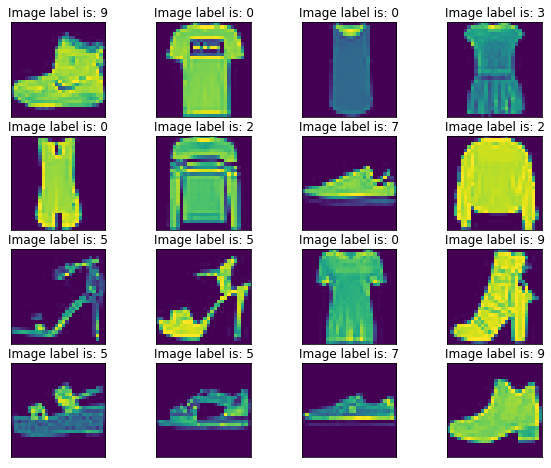

In [313]:
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

Here we can see that each image has a label of a number between 0 and 9. 

Each number represents which clothing wear is shown, and by so will easily help us classify each image.

Label Description: 
    
    0 T-shirt/top 
    1 Trouser 
    2 Pullover 
    3 Dress 
    4 Coat 
    5 Sandal 
    6 Shirt 
    7 Sneaker 
    8 Bag 
    9 Ankle boot

##### In the following visualization you can see the images in grayscale. Here they may seem a little clearer.

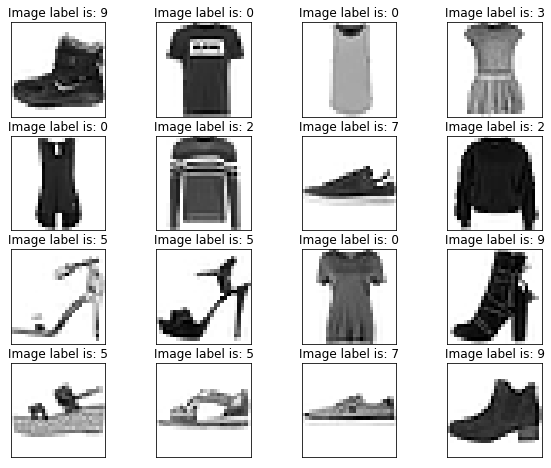

In [314]:
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

##### Now, we will use a plot in order to compare the number of images in each class:

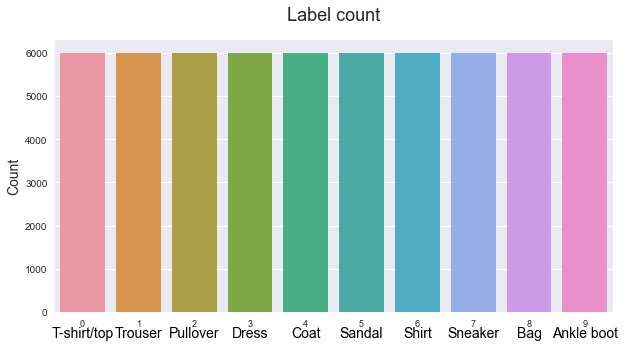

In [383]:
dictionary = {
    0 :'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

#Plot
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.countplot(x=y_train, ax = ax)

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 9)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);

Each label has six-thousand samples and so the classes are balanced!

### Data Size

In [315]:
print(y_train)
print("y_train shape is", y_train.shape)

[9 0 0 ... 3 0 5]
y_train shape is (60000,)


The labels are an array of integers, ranging from 0 to 9.

In [363]:
print(X_train)
print("X_train shape is", X_train.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
X_train shape is (60000, 28, 28)


From this information we understand that this is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 

### Changing the dimensions of the data

Now, in order to work with the data, we will need to reshape it from 2D arrays (images represented as 28X28 arrays), into 1D arrays, sized 784.

This way, each image will have 784 features, while each feature will represent a pixels' intensity (from 0 to 255, meaning from white to black).

Each instance's feature vector will have similarities to other vectors, and so we will use that similarity in order to classify other images as the same clothing wear.

In [365]:
x_train = X_train.reshape(-1, 28*28)
x_test=X_test.reshape(-1, 28*28)
print("x_test shape is", x_test.shape)
print("x_train shape is", x_train.shape)

x_test shape is (10000, 784)
x_train shape is (60000, 784)


As the dimension of each image was 28x28, we now realize that the entire database got reshaped using the format [-1 (all elements), height * width]

### Dimensionality Reduction using PCA

We need dimensionality reduction so the training set won't take up much space and slow down the classification algorithms>

In order to choose the right number of dimensions to reduce down to, we will require a preservation of 95% of the variance.

Variance refers to the spread of the data set.

In [320]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
feat = np.argmax(cumsum >= 0.95) + 1
print("Number of features required for preservation of 95% of the variance is ", feat)

Number of features required for preservation of 95% of the variance is  187


In [322]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)
print("Amount of features the data has after the dimensionality reduction using PCA is", pca.n_components_)
print("The dimensionality reduction saved", np.sum(pca.explained_variance_ratio_) *100 ,"% of the variance")

Amount of features the data has after the dimensionality reduction using PCA is 187
The dimensionality reduction saved 95.00039103537347 % of the variance


Now, in order to decompress the reduced dataset back to 784 dimensions, we will use inverse transformation of the PCA projection

In [330]:
pca = PCA(n_components = 187)
X_reduced = pca.fit_transform(x_train)
X_recovered = pca.inverse_transform(X_reduced)
X_reduced_pca = X_reduced

Visualizing the outcome:

Text(0.5, 1.0, 'Compressed')

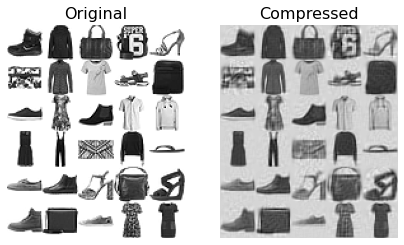

In [329]:
def plot_digits(instances, images_p_row=5, **options):
    size = 28
    images_p_row = min(len(instances), images_p_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_p_row + 1
    row_images = []
    n_empty = n_rows * images_p_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_p_row : (row + 1) * images_p_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

#Plotting the original dataset
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2000])
plt.title("Original", fontsize=16)

#Plotting the compressed dataset
plt.subplot(122)
plot_digits(X_recovered[::2000])
plt.title("Compressed", fontsize=16)

We can see that the projection lost some information, but it is quite close to the original data.

### Dummy Model

A dummy classifier is used as a simple classifier to compare with more complex classifiers.

Dummy Classifier Accuracy:  0.1


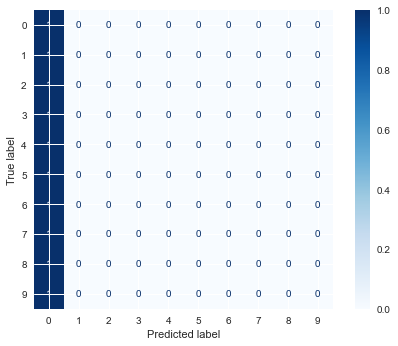

In [394]:
from sklearn.metrics import plot_confusion_matrix
dummy = DummyClassifier(random_state=42) 
dummy.fit(X_reduced_pca, y_train)
y_train_predict = dummy.predict(X_reduced_pca)

print("Dummy Classifier Accuracy: ", accuracy_score(y_train, dc.predict(X_reduced_pca)))
plot_confusion_matrix(estimator=dummy, X=X_reduced_pca, y_true=y_train, normalize='true', cmap='Blues')

Our dummy classifier gives us accuracy of 49%, thats around 50%.

### The Models

We will be comparing three classifying models: Logistic Regression, Decision Tree and Random Forest. 
The 2 models with the best score will be used in the Soft Voting Classifier Model and XGB Classifier Model.
The model with the highest score will be put to the test.

Our scoring method is the Accuracy Classification Score.

The accuracy_score method is used to calculate the accuracy of either the faction or count of correct prediction.
Meaning the set of x_labels predicted for a sample must exactly match the corresponding set of labels in y_labels.

#### Logistic Regression Classifier

Linear regression analysis is used to predict the value of a variable based on the value of another variable.

Logistic Regression Accuracy:  0.8629666666666667


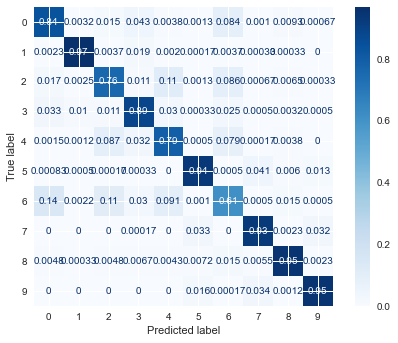

In [391]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_reduced_pca, y_train)
y_train_predict = lr.predict(X_reduced_pca)

print("Logistic Regression Accuracy: ", accuracy_score(y_train, lr.predict(X_reduced_pca)))

#Plot result in Confusion Matrix
plot_confusion_matrix(estimator=lr, X=X_reduced_pca, y_true=y_train, normalize='true', cmap='Blues')

#### Decision Tree Classifier

The Decision Tree Classifier acquires knowledge in the form of a tree, which can also be rewritten as a set of discrete rules to make it easier to understand.

In [344]:
dec_tree = DecisionTreeClassifier(max_depth=20, random_state=42)
dec_tree.fit(X_reduced_pca, y_train)
y_train_predict = dec_tree.predict(X_reduced_pca)

print("Decision Tree Accuracy: ", accuracy_score(y_train, y_train_predict))

Decision Tree Accuracy:  0.9814


#### Random Forest Classifier

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and merge them together to get a more accurate and stable prediction. 

n_estimators represents the number of trees you want to build before taking the maximum voting or averages of predictions.
max_depth represents the maximum depth of each tree in the forest.

In [338]:
rnd = RandomForestClassifier(n_estimators=40, max_depth=15, random_state=42)
rnd.fit(X_reduced_pca, y_train)
y_train_predict = rnd.predict(X_reduced_pca)

print("Random Forest Accuracy: ", accuracy_score(y_train, y_train_predict))

Random Forest Accuracy:  0.96385


#### Soft Voting Classifier 

In [274]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_reduced_pca, y_train)
y_train_predict = voting_clf.predict(X_reduced_pca)

print("Ensemble Accuracy: ", accuracy_score(y_train, y_train_predict))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     random_state=42))],
                 voting='soft')

In [276]:
    # Predicting all instances of training dataset X_train_scaled using the above trained model


In [277]:


print("Ensemble F1 Score: ", voting_f1_score)

Ensemble Accuracy:  0.94005
Ensemble F1 Score:  0.9397446159558501


In [ ]:
Next I'll try XGBClassifier

In [278]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf.fit(X_reduced_pca, y_train)

[19:34:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [279]:
# Predicting some instance from the data set using the above trained model
y_train_predict = xgb_clf.predict(X_reduced_pca[0].reshape(1, -1))

In [280]:
# Predicting all instances of training dataset X_train using the above trained model
y_train_predict = xgb_clf.predict(X_reduced_pca)

In [281]:
xgb_accuracy = accuracy_score(y_train, y_train_predict)

xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)

print("XGBoost F1 Score: ", xgb_f1_score)

XGBoost Accuracy:  0.9964833333333334
XGBoost F1 Score:  0.9964824482530669


### Testing the chosen model